In [9]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("C:/Users/wjdqh/injige/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
# 2. 불필요한 컬럼 제거
df = df.drop(['id', 'date'], axis=1)

# 3. 범주형 변수 원-핫 인코딩 (zipcode)
df = pd.get_dummies(df, columns=['zipcode'])

# 4. 입력(X), 타겟(y) 분리
X = df.drop('price', axis=1)
y = df['price']

# 5. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 7. 딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # 출력층 (회귀)
])

C:\Users\wjdqh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 8. 컴파일 및 학습
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,257 (32.25 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 9. 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 415368904704.0000 - mae: 537236.3750 - val_loss: 352117948416.0000 - val_mae: 505949.7500
Epoch 2/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 303875391488.0000 - mae: 458455.5938 - val_loss: 96399450112.0000 - val_mae: 263948.5000
Epoch 3/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 89272573952.0000 - mae: 237788.6562 - val_loss: 50917609472.0000 - val_mae: 184112.7188
Epoch 4/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 46967865344.0000 - mae: 168578.4375 - val_loss: 34223398912.0000 - val_mae: 140731.4688
Epoch 5/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32852676608.0000 - mae: 132015.9375 - val_loss: 26560370688.0000 - val_mae: 116830.1562
Epoch 6/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 27333490688.0000 - mae: 111051.2734 - val_loss: 22769473536.0000 - val_mae: 103508.1797
Epoch 7/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 26085058560.0000 - mae: 101387.1328 - val_loss: 2

In [15]:
# 10. 예측 및 평가
y_pred = model.predict(X_test_scaled).flatten()
print("=== 딥러닝 회귀 모델 성능 ===")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== 딥러닝 회귀 모델 성능 ===
MAE: 81363.27207306847
MSE: 21194947604.384796
R² Score: 0.8598001816022196


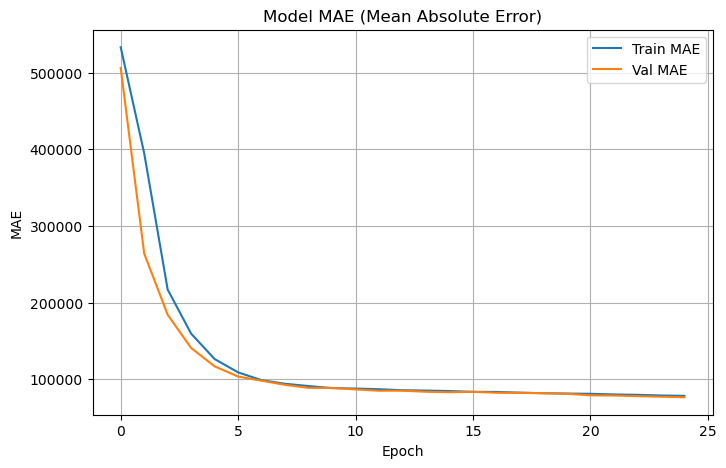

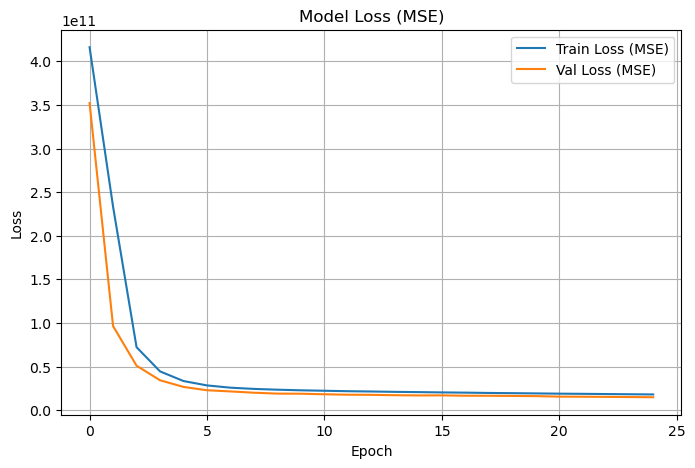

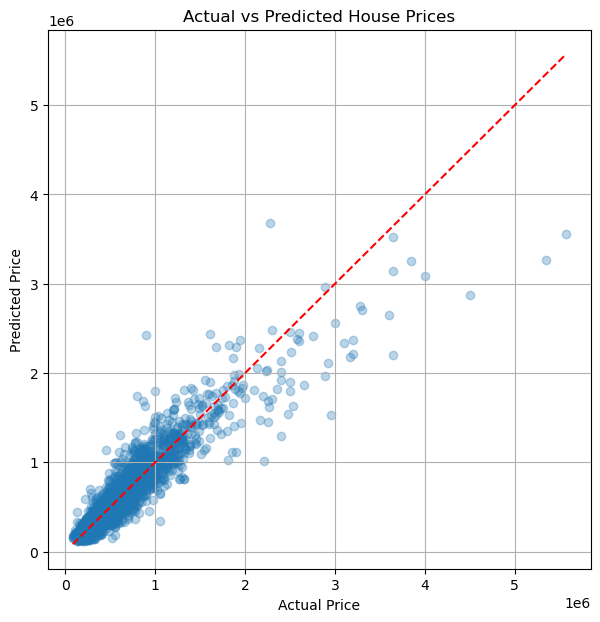

In [16]:
# 11. 시각화

# (1) MAE 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

# (2) MSE (Loss) 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# (3) 실제 vs 예측 산점도
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()